<a href="https://colab.research.google.com/github/dataexpert-moon/Algorthim_Study/blob/demo-repo/DL_Study/%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%83%E1%85%A1%E1%86%AF%E1%84%86%E1%85%B5%E1%86%AB_7%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6 학습 관련 기술들

### 6.3 배치 정규화

- 배치 정규화: 각 층의 활성화를 적당히 분포되도록 조정

#### 6.3.1 배치 정규화 알고리즘

##### 배치 정규화가 주목받는 이유
- 학습을 빨리 진행할 수 있다.
- 초기값에 크게 의존하지 않는다.
- 오버피팅을 억제한다.

##### 배치정규화: 학습시 미니배치를 단위로 정규화

- 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화

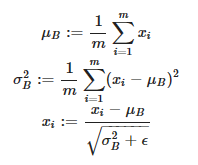

미니배치 B={x1, x2, ..., xm}

m개의 입력 데이터의 집합에 대해 평균과 분산을 구함.

그 입력 데이터를 평균이 0, 분산이 1이 되게 (적절한 분포가 되게) 정규화

배치 정규화 계층마다 정규화된 데이터에 고유한 확대와 이동 변환을 수행

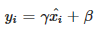

두 값은 처음에는 1, 0으로 (원본 그대로) 학습하면서 적합한 값으로 조정

#### 6.3.2 배치 정규화의 효과
MNIST 셋을 사용하여 배치 정규화 계층을 사용할 때와 사용하지 않을 때 학습 진도
가중치 초기값의 표준편차를 다양하게 바꿔가며 학습 경과를 관찰한 그래프

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import sys

sys.path.append('/content/drive/MyDrive/CUAI_6th/DL1_Study')

Mounted at /content/drive


/content/drive/MyDrive/CUAI_6th/DL1_Study/common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
/content/drive/MyDrive/CUAI_6th/DL1_Study/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/MyDrive/CUAI_6th/DL1_Study/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


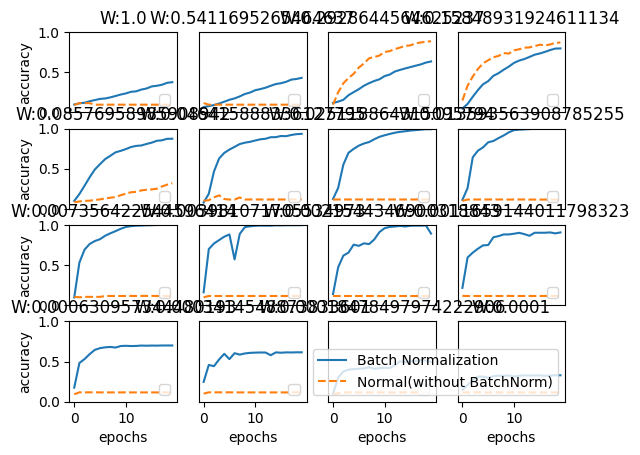

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            #print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    #print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

거의 모든 경우에 배치 정규화를 사용할 때 학습 진도가 빠른 것으로 나타남

### 6.4 바른 학습을 위해

오버피팅: 신경망의 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에 제대로 대응하지 못하는 상태


#### 6.4.1 오버피팅

오버피팅이 발생하는 경우

- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음

이 두 요건을 일부러 충족하여 오버피팅 발생

훈련 데이터 중 300개만 사용. 7층 네트워크를 사용해 네트워크 복잡성을 높임

각 층의 뉴런은 100개 활성화 함수는 ReLU를 사용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import sys

sys.path.append('/content/drive/MyDrive/CUAI_6th/DL1_Study')

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# weight decay（가중치 감쇠） 설정
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.03333333333333333, test acc:0.0663
epoch:1, train acc:0.05, test acc:0.0769
epoch:2, train acc:0.07, test acc:0.0832
epoch:3, train acc:0.09, test acc:0.0988
epoch:4, train acc:0.13333333333333333, test acc:0.1179
epoch:5, train acc:0.17333333333333334, test acc:0.1368
epoch:6, train acc:0.22, test acc:0.1605
epoch:7, train acc:0.2633333333333333, test acc:0.1905
epoch:8, train acc:0.31333333333333335, test acc:0.2091
epoch:9, train acc:0.33, test acc:0.2257
epoch:10, train acc:0.3566666666666667, test acc:0.2443
epoch:11, train acc:0.4033333333333333, test acc:0.2778
epoch:12, train acc:0.4166666666666667, test acc:0.2827
epoch:13, train acc:0.47, test acc:0.3213
epoch:14, train acc:0.5233333333333333, test acc:0.3536
epoch:15, train acc:0.52, test acc:0.3543
epoch:16, train acc:0.5333333333333333, test acc:0.373
epoch:17, train acc:0.5466666666666666, test acc:0.3856
epoch:18, train acc:0.57, test acc:0.4062
epoch:19, train acc:0.6033333333333334, test acc:0.4284

train_acc_list와 test_acc_list에는 에폭단위의 정확도를 저장.

이 두 리스트를 다음처럼 그래프로 그림

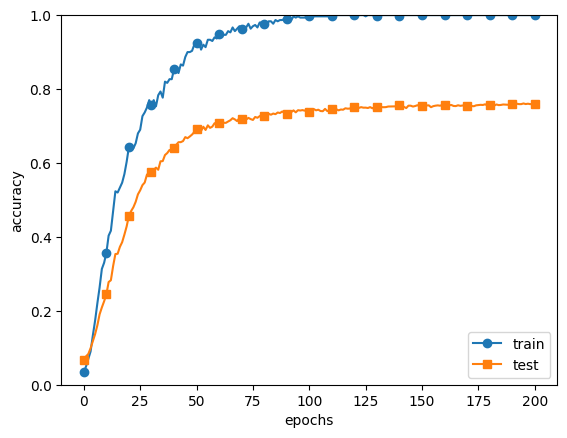

In [ ]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

정확도가 크게 벌어지는 것은 훈련 데이터에만 적응(fitting)한 결과다.

#### 6.4.2 가중치 감소

가중치 감소(weight decay)

학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제하는 방법

가중치를 W라 하면 L2 법칙에 따른 가중치 감소는 1/2 λ (W**2) 가 되고 이 값을 손실함수에 더함

λ(람다)는 정규화의 세기를 조절하는 하이퍼파라미터. 이 값을 크게 설정할 수록 큰 가중치에 대한 패널티가 커짐

L2 법칙

W = (W1, W2, ..., Wn)이 있다면

L2 법칙은

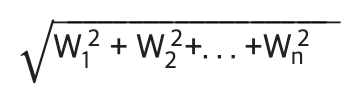

가중치 감소(λ=0.1)를 적용한 결과

epoch:0, train acc:0.07333333333333333, test acc:0.097
epoch:1, train acc:0.12, test acc:0.1115
epoch:2, train acc:0.18, test acc:0.1306
epoch:3, train acc:0.20333333333333334, test acc:0.1393
epoch:4, train acc:0.22, test acc:0.1627
epoch:5, train acc:0.24, test acc:0.184
epoch:6, train acc:0.2866666666666667, test acc:0.1973
epoch:7, train acc:0.32666666666666666, test acc:0.2158
epoch:8, train acc:0.36666666666666664, test acc:0.2273
epoch:9, train acc:0.36666666666666664, test acc:0.2364
epoch:10, train acc:0.3933333333333333, test acc:0.2577
epoch:11, train acc:0.4, test acc:0.2678
epoch:12, train acc:0.42333333333333334, test acc:0.284
epoch:13, train acc:0.42333333333333334, test acc:0.2976
epoch:14, train acc:0.43666666666666665, test acc:0.3138
epoch:15, train acc:0.4533333333333333, test acc:0.3311
epoch:16, train acc:0.47333333333333333, test acc:0.3467
epoch:17, train acc:0.5166666666666667, test acc:0.3581
epoch:18, train acc:0.5333333333333333, test acc:0.3713
epoch:19, t

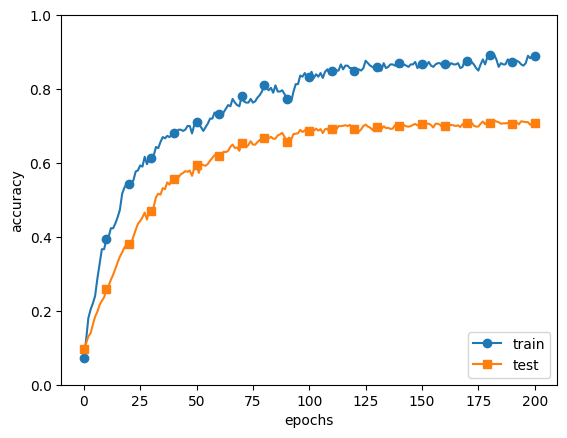

In [ ]:
# weight decay（가중치 감쇠） 설정
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
            
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터에 대한 정확도와 시험 데이터에 대한 정확도는 그림 6-20에 비해 줄었다.

오버피팅이 억제되었다.

#### 6.4.3 드롭아웃

신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려움

드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법

훈련 때에는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택.

시험 때에는 모든 뉴런에 신호를 전달. 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력.

드롭아웃 구현

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시

역전파 때의 동작은 ReLU와 같음

순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단한다

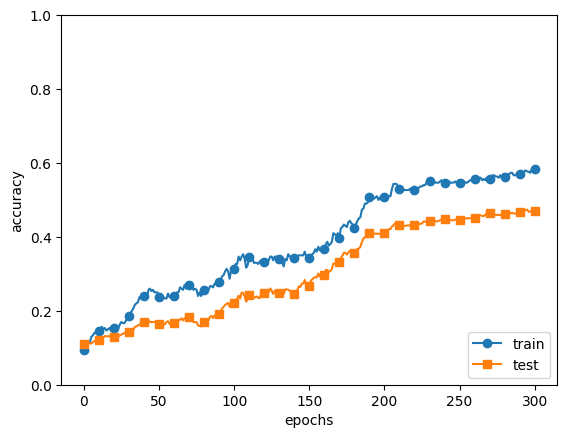

In [ ]:
# 데이터 가져오기
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=False)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃을 적용하니 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었다

드롭아웃을 이용하면 표현력을 높이면서 오버피팅을 억제 가능하다

**앙상블 학습(ensenble learning)**

같은 구조의 네트워크를 여러 개 준비하여 따로따로 학습, 여러 개의 출력을 평균내어 답변한다

드롭아웃은 앙상블 학습과 같은 효과를 (대략) 하나의 네트워크로 구현했다고 볼 수 있다

### 6.5 적절한 하이퍼파라미터 값 찾기

각 층의 뉴런수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등

하이퍼파라미터 값을 최대한 효율적으로 탐색하는 방법

#### 6.5.1 검증 데이터

하이퍼 파라미터 성능을 평가할 때는 시험 데이터를 사용해서는 안됨
-> 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문

검증 데이터(validation data) : 하이퍼파라미터 전용 확인 데이터

훈련 데이터 : 매개변수 학습

시험 데이터 : 신경망의 범용 성능 평가

데이터셋에 따라서는 훈련 데이터, 검증 데이터, 시험 데이터를 미리 분리해둔 것도 있음

MNIST 데이터셋에서 검증 데이터를 얻는 가장 간단한 방법은 훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분리

In [ ]:
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

훈련 데이터를 분리하기 전에 입력 데이터와 정답 레이블을 shuffle_dataset으로 뒤섞음

데이터 셋 안의 데이터가 치우쳐 있을지 모르기 때문

#### 6.5.2 하이퍼파라미터 최적화

하이퍼파라미터 최적화 단계

- 0단계: 하이퍼파라미터 값의 범위를 설정
- 1단계: 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출

무작위로 샘플링해 탐색하는 것이 좋은 결과. 최정 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문
'10의 계승'단위로 범위를 지정. 로그 스케일(log scale)로 지정.

- 2단계: 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 정확도를 평가. (에폭은 작게 설정)
- 3단계: 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

**베이즈 최적화(Bayesian optimization)**

- 베이즈 정리(Bayes' theorem)를 중심으로 한 수학 이론을 구사하여 더 엄밀하고 효율적으로 최적화를 수행

#### 6.5.3 하이퍼파라미터 최적화 구현하기

하이퍼파라미터 검증은 로그 스케일 범위에서 무작위로 추출해 수행

파이썬코드로는 10 ** np.random.uniform(-3,3)처럼 작성

이 예에서는 가중치 감소 계수를 10^-8 ~ 10^-4, 학습률을 10^-6 ~ 10^-2 범위부터 시작

하이퍼파라미터 무작위 추출코드

In [ ]:
weight_decay = 10**np.random.uniform(-8,-4)
lr = 10**np.random.uniform(-6,-2)

가중치 감소 계수 범위를 10-8 ~ 10-4, 학습률의 범위를 10-6~10-2 실험한 결과

In [ ]:
# 데이터 가져오기
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = x_train.shape[0] * validation_rate

validation_num

100.0

val acc:0.14 | lr:1.965632726111735e-06, weight decay:1.4394111398321284e-05
val acc:0.1 | lr:2.5750711915688655e-05, weight decay:3.72480414538767e-08
val acc:0.37 | lr:0.0013791465355764308, weight decay:4.0236266188077044e-08
val acc:0.04 | lr:1.590819151474445e-05, weight decay:3.2683832369412706e-05
val acc:0.34 | lr:0.00278456283684204, weight decay:1.7923809473374836e-07
val acc:0.56 | lr:0.0029433589358670246, weight decay:6.530560638649534e-05
val acc:0.18 | lr:0.0006501372852972675, weight decay:2.3723168263371694e-08
val acc:0.07 | lr:4.859922529052222e-06, weight decay:3.1383060459684844e-07
val acc:0.48 | lr:0.0034144123599255285, weight decay:1.967635047621149e-07
val acc:0.09 | lr:0.00022002447472722664, weight decay:2.240731434066067e-08
val acc:0.42 | lr:0.0019312675173845763, weight decay:1.7025523347029305e-05
val acc:0.32 | lr:0.0010982005244742933, weight decay:5.931495315109136e-05
val acc:0.08 | lr:4.048721187919586e-05, weight decay:6.950521532629566e-08
val acc

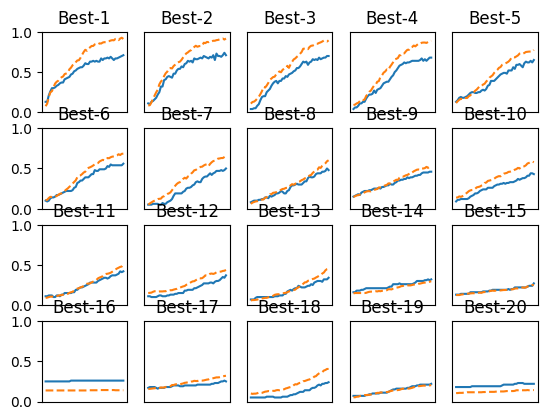

In [ ]:
# 데이터 가져오기
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

Best-5 정도까지 학습이 순조롭게 진행

결과로 볼 때 학습률은 0.001 ~ 0.01, 가중치 감소 계수는 10^-8 ~ 10^-6 정도임을 알 수 있다

다음은 축소된 범위로 똑같은 작업을 반복

범위를 좁혀가다가 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택

### 6.6 정리

**이번 장에서 배운 것**

매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있음

가중치 초기값을 정하는 방법은 올바른 학습을 하는데 매우 중요

가중치의 초기값은 Xavier 초기값(Sigmoid, tanh)과 He 초기값(ReLU)이 효과적

배치 정규화(normalization)를 이용하면 학습을 빠르게 진행, 초기값에 영향을 덜 받게 됨

오버피팅을 억제하는 정규화(regularization) 기술로는 가중치 감소와 드롭아웃이 있음

하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적